### Assignment 05 Read-Me

This builds on the exploratory analysis you did for assignment #3. You will be submitting a link to your GitHub repository.

Using the same repository you created for assignment #3:

Add the cleaned up version of your data (if you needed to do pre-cleaning) to your data folder
Create a new notebook in the main folder that will be used for your regression analysis


Perform regression analysis on your dataset. You'll do this from two (2) different angles:

Interpretation
- Using the full dataset, create an OLS regression model using statsmodels.
- Which variables are significant and which are insignificant? What is the overall explanatory power of the model? Are there concerns about the residual distribution? Explain what you are seeing and provide any supporting charts.

Prediction
- Using a simple training and test split, split your data into two groups - one for modeling and another for evaluation.
- Run an OLS regression and comment on the predictive performance.
- Run a Ridge or Lasso regression with a few different levels of regularization strength. Does this help or hurt performance? What happens as you increase the regularization strength? How do the coefficients compare with OLS? Explain what you are seeing and provide any supporting charts.


Rubric:
- (10%) Data and notebook are included in the GitHub repository
- (10%) Jupyter Notebook
	- Markdown cells properly formatted. Major steps in the analysis should be described in the markdown and results should be discussed immediately after the code block.
	- All code blocks have output below - no errors or cells that weren’t executed.
	- Narratives are properly formatted, with correct grammar and punctuation.
- (10%) Output of professional quality
	- Charts properly labeled (axis labels, titles, …)
- (70%) Completeness of regression analysis
    - (5%) Discussion of business question / objective that is being analyzed (variable you are running the regression on and why)
    - (15%) Interpretation model - ran the regression model, print output, discussion of results
    - (50%) Predictive models - ran the OLS model (10%), ran the Ridge or Lasso on multiple alpha (15%), commented on results (5%), compared coefficients (10%), explanation of findings (10%)

In [168]:
# ---- Required Packages ---- #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [169]:
# ---- Importing Datasets ---- #
real_property = pd.read_csv(r"C:\Users\meroo\OneDrive - UMBC\Class\Class 2021\DATA 602\DATA602\Assignments\Assignment_03\data\Real_Property_Information.csv")
real_property.head(5)

,PropertyID,Block,Lot,Ward,Sect,PropertyAddress,LotSize,CityTax,StateTax,ResCode,AmountDue,AsOfDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,ESRI_OID
0,0001001,0001,001,15,370,2045 W NORTH AVE,15-2X83-10,3412.46,170.02,NOT A PRINCIPAL RESIDENCE,3582.48,2021/07/31 04:00:00+00,Easterwood,Western,7.0,"(39.30941347, -76.65114364)",22502
1,0001002,0001,002,15,370,2043 W NORTH AVE,14X83-10,1112.76,55.44,NOT A PRINCIPAL RESIDENCE,NaN,2018/06/04 04:00:00+00,Easterwood,Western,7.0,"(39.30941619, -76.65109034)",22503
2,0001003,0001,003,15,370,2041 W NORTH AVE,14X83-10,202.32,10.08,NOT A PRINCIPAL RESIDENCE,212.40,2021/07/31 04:00:00+00,Easterwood,Western,7.0,"(39.30941765, -76.65104058)",22504
3,0001004,0001,004,15,370,2039 W NORTH AVE,14X83-10,202.32,10.08,NOT A PRINCIPAL RESIDENCE,212.40,2021/07/31 04:00:00+00,Easterwood,Western,7.0,"(39.30941951, -76.65099026)",22505
4,0001005,0001,005,15,370,2037 W NORTH AVE,14X83-10,502.05,25.01,NOT A PRINCIPAL RESIDENCE,527.06,2021/07/31 04:00:00+00,Easterwood,Western,7.0,"(39.30942111, -76.65094166)",22506


In [170]:
rp = real_property
rp.dropna(inplace=True)

In [171]:
# --- Numerical Lat-Lon --- # 
locations = [str(loc).split(",") for loc in rp.Location.tolist()]

Lat = []
Lon = []

for lat, lon in locations:
    Lat.append(float(lat.replace("(", "")))
    Lon.append(float(lon.strip().replace(")", "")))

rp["Lat"] = Lat
rp["Lon"] = Lon

In [187]:
# --- Numerical ResCode --- # 
rescodes = [str(rc).split(",") for rc in rp.ResCode.tolist()]

res = []
for rescode in rescodes:
    if rescode == "PRINCIPAL RESIDENCE":
        res.append(1)
    else: res.append(2)

rp["Res"] = res

In [188]:
rp.head()

,PropertyID,Block,Lot,Ward,Sect,PropertyAddress,LotSize,CityTax,StateTax,ResCode,AmountDue,AsOfDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,ESRI_OID,Lat,Lon,Res
0,0001001,0001,001,15,370,2045 W NORTH AVE,15-2X83-10,3412.46,170.02,NOT A PRINCIPAL RESIDENCE,3582.48,2021/07/31 04:00:00+00,Easterwood,Western,7.0,"(39.30941347, -76.65114364)",22502,39.309413,-76.651144,2
2,0001003,0001,003,15,370,2041 W NORTH AVE,14X83-10,202.32,10.08,NOT A PRINCIPAL RESIDENCE,212.40,2021/07/31 04:00:00+00,Easterwood,Western,7.0,"(39.30941765, -76.65104058)",22504,39.309418,-76.651041,2
3,0001004,0001,004,15,370,2039 W NORTH AVE,14X83-10,202.32,10.08,NOT A PRINCIPAL RESIDENCE,212.40,2021/07/31 04:00:00+00,Easterwood,Western,7.0,"(39.30941951, -76.65099026)",22505,39.309420,-76.650990,2
4,0001005,0001,005,15,370,2037 W NORTH AVE,14X83-10,502.05,25.01,NOT A PRINCIPAL RESIDENCE,527.06,2021/07/31 04:00:00+00,Easterwood,Western,7.0,"(39.30942111, -76.65094166)",22506,39.309421,-76.650942,2
6,0001007,0001,007,15,370,2033 W NORTH AVE,14X83-10,502.05,25.01,NOT A PRINCIPAL RESIDENCE,527.06,2021/07/31 04:00:00+00,Easterwood,Western,7.0,"(39.30942444, -76.65084104)",22508,39.309424,-76.650841,2


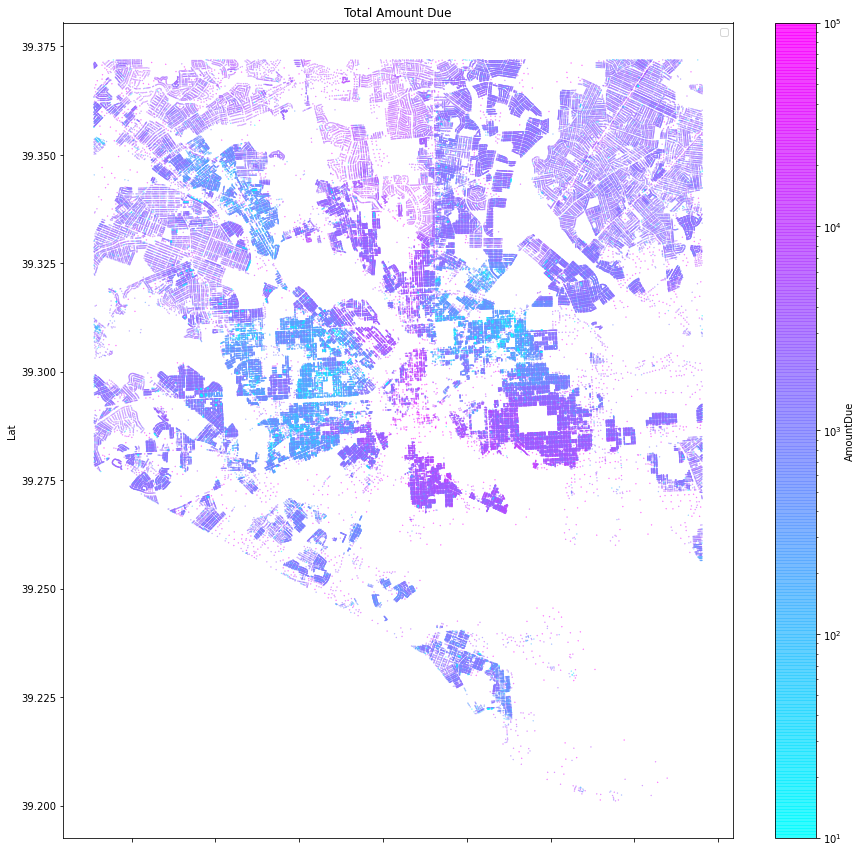

In [189]:
import matplotlib as mpl

rp.plot(kind='scatter', x='Lon', y='Lat', alpha=0.8, s=0.1,
            label='Amount Due', figsize=(15,15), c='AmountDue', cmap=plt.get_cmap('cool'),
            colorbar=True, norm=mpl.colors.LogNorm(vmin=1e1, vmax=1e5))
plt.legend('')
plt.title('Total Amount Due')
plt.show()

In [203]:
rp2 = rp.drop(columns=["Location", "ESRI_OID", "PoliceDistrict", "AsOfDate", "Neighborhood", "ResCode", "PropertyAddress", "PropertyID", "LotSize", "Block", "Lot"])
rp2["const"]=1
rp2.head(20)

,Ward,Sect,CityTax,StateTax,AmountDue,CouncilDistrict,Lat,Lon,Res,const
0,15,370,3412.46,170.02,3582.48,7.0,39.309413,-76.651144,2,1
2,15,370,202.32,10.08,212.40,7.0,39.309418,-76.651041,2,1
3,15,370,202.32,10.08,212.40,7.0,39.309420,-76.650990,2,1
4,15,370,502.05,25.01,527.06,7.0,39.309421,-76.650942,2,1
6,15,370,502.05,25.01,527.06,7.0,39.309424,-76.650841,2,1
7,15,370,202.32,10.08,212.40,7.0,39.309426,-76.650793,2,1
8,15,370,502.05,25.01,527.06,7.0,39.309428,-76.650746,2,1
9,15,370,502.05,25.01,527.06,7.0,39.309429,-76.650695,2,1
10,15,370,502.05,25.01,527.06,7.0,39.309431,-76.650646,2,1
11,15,370,502.05,25.01,527.06,7.0,39.309433,-76.650596,2,1


In [204]:
rp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192976 entries, 0 to 237752
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Ward             192976 non-null  int64  
 1   Sect             192976 non-null  int64  
 2   CityTax          192976 non-null  float64
 3   StateTax         192976 non-null  float64
 4   AmountDue        192976 non-null  float64
 5   CouncilDistrict  192976 non-null  float64
 6   Lat              192976 non-null  float64
 7   Lon              192976 non-null  float64
 8   Res              192976 non-null  int64  
 9   const            192976 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 16.2 MB


In [205]:
import statsmodels.api as smf

featureNames = [x for x in rp2.columns if x != 'AmountDue']
olsModel = smf.OLS(rp2["AmountDue"], rp2[featureNames]).fit()
print(olsModel.summary())

                            OLS Regression Results                            
Dep. Variable:              AmountDue   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                 5.749e+04
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:59:19   Log-Likelihood:            -2.1266e+06
No. Observations:              192976   AIC:                         4.253e+06
Df Residuals:                  192968   BIC:                         4.253e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Ward               -7.0920      4.545     

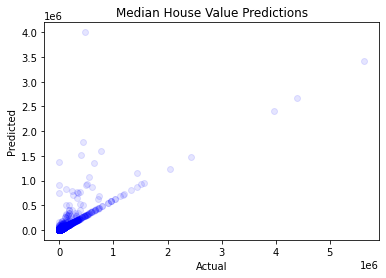

In [206]:
yhat = olsModel.predict(rp2[featureNames])

plt.plot(rp2['AmountDue'], yhat, 'bo', alpha=0.1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Median House Value Predictions')
plt.show()

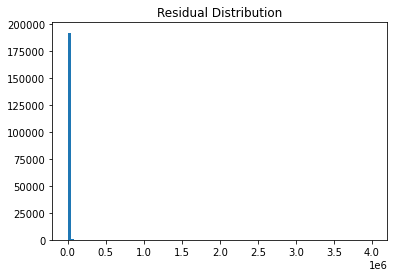

In [207]:
plt.hist(yhat, bins=100)
plt.title('Residual Distribution')
plt.show()

C:\Users\meroo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:89: UserWarning: Attempting to set identical left == right == 2.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\meroo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:89: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\meroo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:90: UserWarning: Attempting to set identical bottom == top == 2.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\meroo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 2.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\meroo\Anaconda3\lib\site-pa

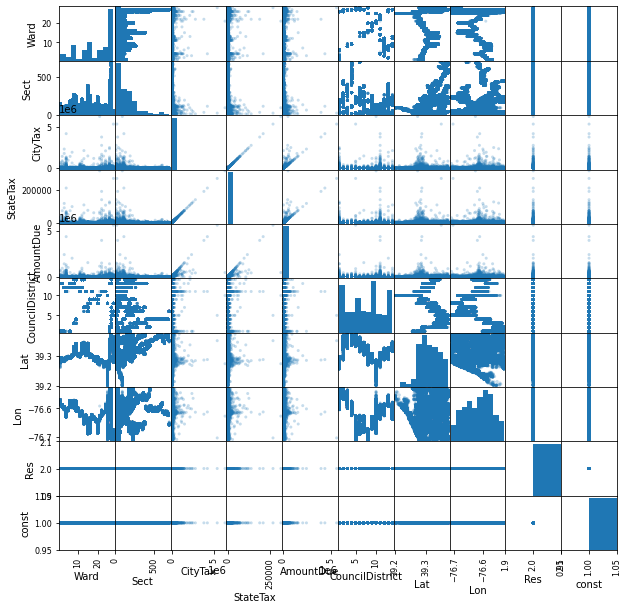

In [208]:
pd.plotting.scatter_matrix(rp2, figsize=(10,10), alpha=0.25)
plt.show()

In [219]:
from sklearn.model_selection import train_test_split
x = rp2.drop(columns=["AmountDue"])
y = rp2["AmountDue"]
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.20, random_state=100)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 154,380
Test examples: 38,596


In [221]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

modeling_pipeline = Pipeline([('data_processing', StandardScaler()), ('lm', LinearRegression())])
modeling_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('data_processing', StandardScaler()),
                ('lm', LinearRegression())])

In [222]:
modeling_pipeline.score(X_train, Y_train)

0.6552932452960342

In [223]:
modeling_pipeline.score(X_test, Y_test)

0.8070003281145027

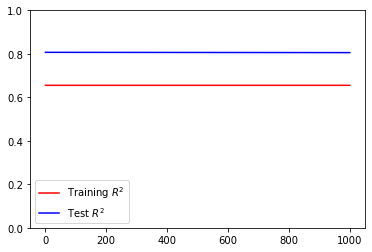

In [228]:
from sklearn.linear_model import Ridge
alphas = [0.01, 0.1, 1, 10, 100, 1000]

training_scores = []
test_scores = []
for alpha in alphas:
    modeling_pipeline = Pipeline([('data_processing', StandardScaler()), ('lm', Ridge(alpha=alpha))])
    modeling_pipeline.fit(X_train, Y_train)
    training_scores.append(modeling_pipeline.score(X_train, Y_train))
    test_scores.append(modeling_pipeline.score(X_test, Y_test))
    
plt.plot(alphas, training_scores, 'r-')
plt.plot(alphas, test_scores, 'b-')
plt.ylim((0,1))
plt.legend(['Training $R^2$', 'Test $R^2$'])
plt.show()